In [131]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import tensorflow as tf

In [132]:
tf.keras.backend.set_floatx("float64")

In [133]:
address = "b_14x50.h5" # change this
burgers_net = tf.keras.models.load_model(address)

# make a function `u(t, x)` to use model easier
u = lambda t, x: burgers_net(tf.concat([t, x], axis=1))

In [134]:
#TRUE SOLUTION: u_array

# given parameter
nu = 0.01/np.pi

# generate points to approximate the outer integral
x_bound = 10
num_pts = 10001
x_prime = np.linspace(-x_bound,x_bound,num_pts)

# step size to approximate the derivative in front of the natural log
h = 0.001

# generate grid of x, t, u(x,t) for plotting
x_len = 200
t_len = 100
x_array = np.linspace(-1,1,x_len)
t_array = np.linspace(0.01,1,t_len)
u_array = np.load('b_truth.npy')

# for i in range(x_len):
#     for j in range(t_len):
#         u_array[i,j] = u(x_array[i],t_array[j],x_prime,h)

In [135]:
#PINN PREDICTION: U

n, m = 100, 200

X = np.linspace(-1., +1., m)
T = np.linspace(0., 1., n)

X0, T0 = np.meshgrid(X, T)
X = X0.reshape([n*m, 1])
T = T0.reshape([n*m, 1])

T, X = map(tf.convert_to_tensor, [X, T])
X.shape, T.shape
U = burgers_net(tf.concat([X, T], axis=1))
U = U.numpy().reshape(m, n)

In [136]:
#MSE FUNCTION

def mean_squared_error(y_true, y_pred):
    """
    Calculate the mean squared error (MSE) between the true values and the predicted values.

    Parameters:
        y_true (numpy.ndarray): Array of true values.
        y_pred (numpy.ndarray): Array of predicted values.

    Returns:
        float: The mean squared error.
    """
    # Ensure the input arrays have the same shape
    assert y_true.shape == y_pred.shape, "Input arrays must have the same shape."

    # Calculate the squared difference between true and predicted values
    squared_diff = (y_true - y_pred) ** 2

    # Calculate the mean of the squared differences
    mse = np.mean(squared_diff)

    return mse


In [137]:
#MAB FUNCTION

def mean_absolute_error(y_true, y_pred):
    """
    Calculate the mean absolute error (MAE) between the true values and the predicted values.

    Parameters:
        y_true (numpy.ndarray): Array of true values.
        y_pred (numpy.ndarray): Array of predicted values.

    Returns:
        float: The mean absolute error.
    """
    # Ensure the input arrays have the same shape
    assert y_true.shape == y_pred.shape, "Input arrays must have the same shape."

    # Calculate the absolute difference between true and predicted values
    absolute_diff = np.abs(y_true - y_pred)

    # Calculate the mean of the absolute differences
    mae = np.mean(absolute_diff)

    return mae


In [138]:
mse_array = np.zeros((x_len, t_len))
max = 0

for i in range(x_len):
    for j in range(t_len):
        mse_array[i,j] = mean_absolute_error(u_array[i, j], U[i, j])
        if(mse_array[i, j] > max):
            max = mse_array[i, j]

print(max)
print(mean_squared_error(u_array, U))

1.938817123460575
0.7379335633684062


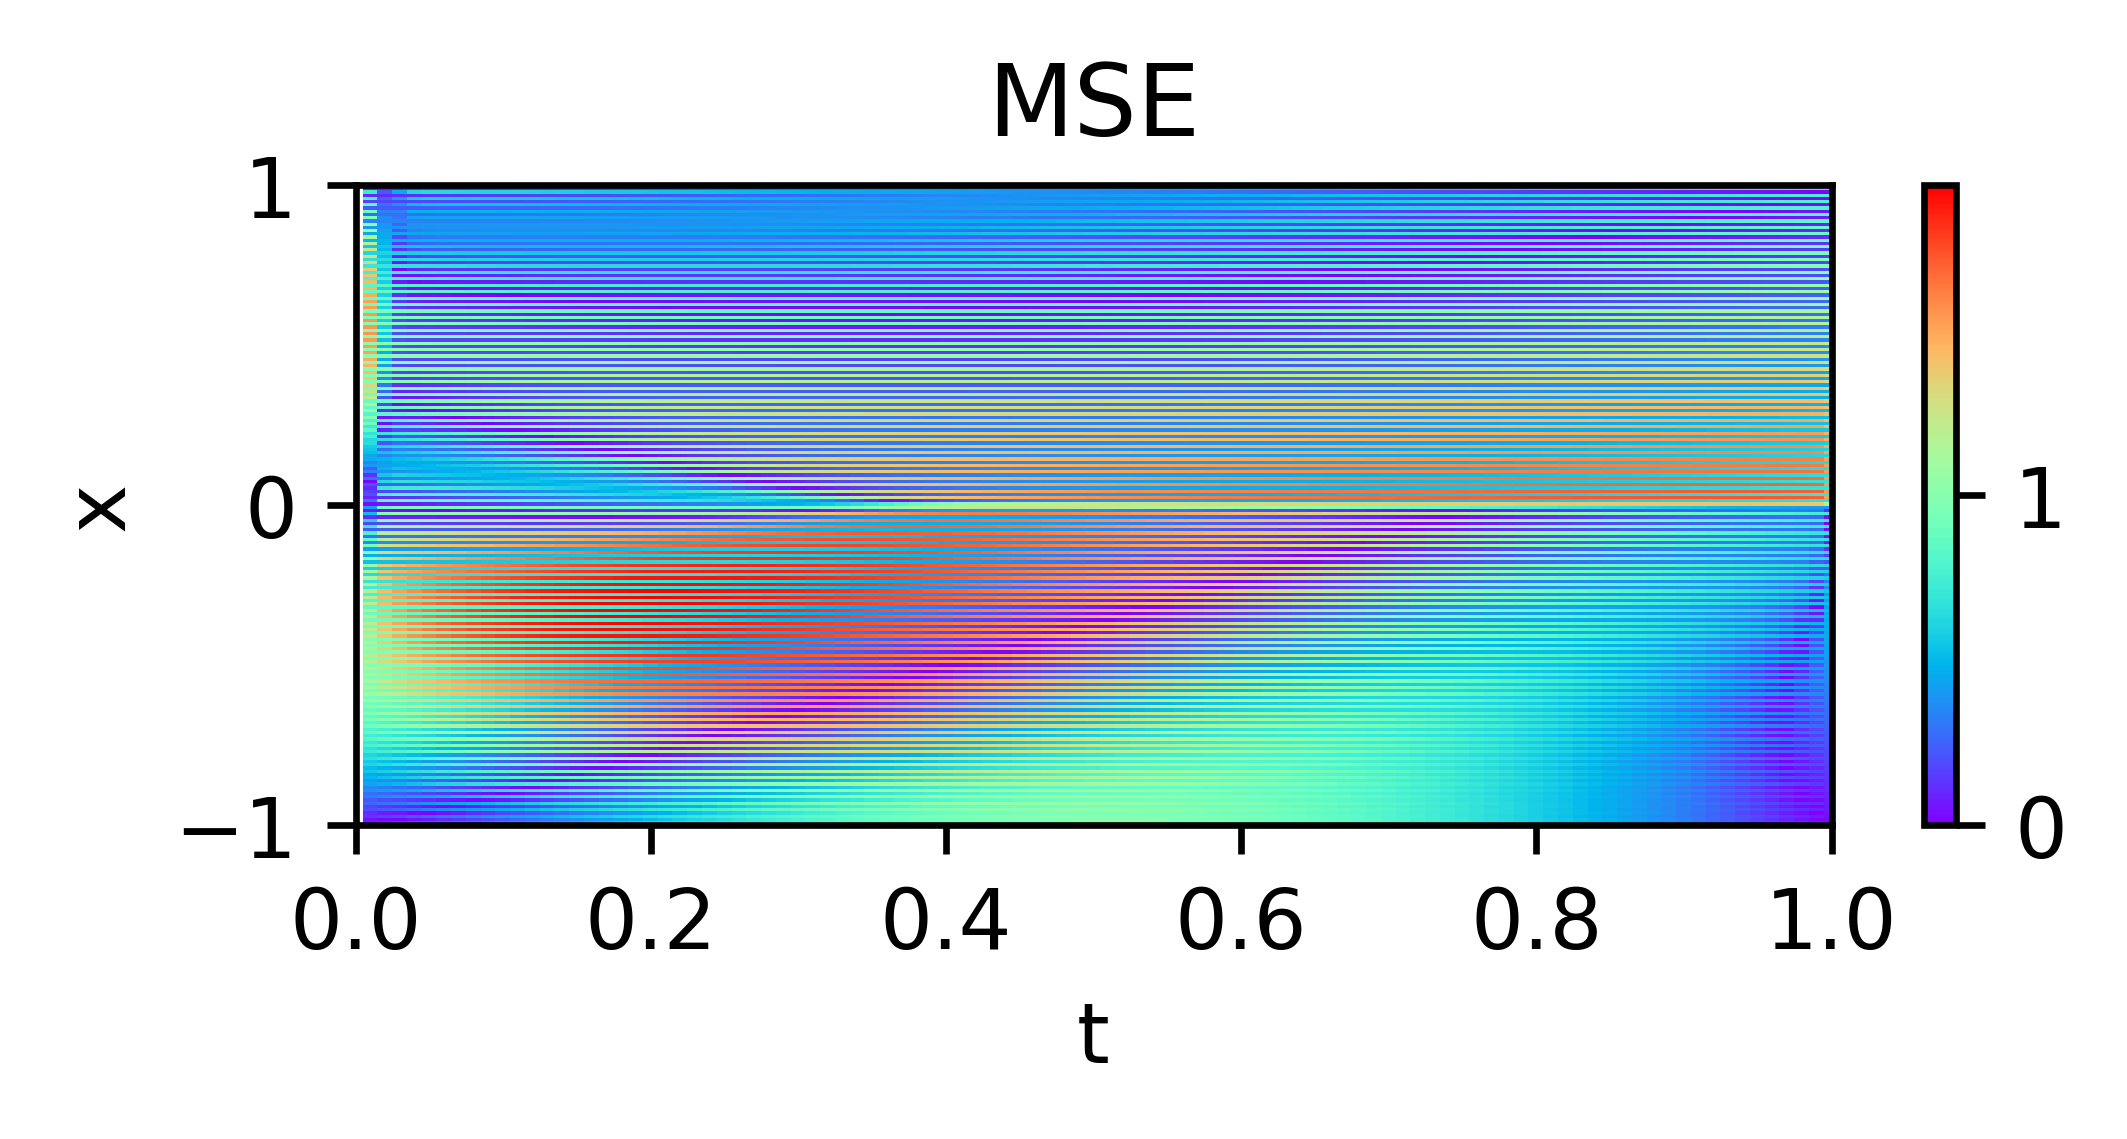

In [139]:
plt.figure(figsize=(4, 2), dpi=600)
plt.pcolor(t_array, x_array, mse_array, cmap=cm.rainbow )
plt.colorbar()
plt.xlim(0., +1.)
plt.ylim(-1., +1.)
plt.clim(0, max)
plt.title("MSE")
plt.ylabel("x")
plt.xlabel("t")
plt.tight_layout()
#plt.savefig('burger_true_sol.png')
plt.show()